# Проверка гипотез для увеличения выручки интернет-магазина

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Описание данных**

Таблица hypothesis:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Таблица orders:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Таблица visitors:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.


## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import scipy.stats as stats
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
import sys
hypothesis = pd.read_csv('/datasets/hypothesis.csv',sep=',') # чтение файла с данными и сохранение в hypothesis
pd.options.display.max_colwidth = 150
orders = pd.read_csv('/datasets/orders.csv') # чтение файла с данными и сохранение в orders
visitors = pd.read_csv('/datasets/visitors.csv') # чтение файла с данными и сохранение в visitors
display(hypothesis.head(10))
hypothesis.to_csv(sys.stdout) # выводим строки полностью в столбце
display()
display(orders.head(10))
display()
display(visitors.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [2]:
display(hypothesis.isna().sum()) # подсчёт пропусков
display()
display(orders.isna().sum())
display()
display(visitors.isna().sum())
display()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [3]:
display(hypothesis.duplicated().sum())# подсчёт явных дубликатов
display()
display(orders.duplicated().sum())
display()
display(visitors.duplicated().sum())
display()

0

0

0

In [4]:
mutual_visitors = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(),
    orders.query('group == "B"')['visitorId'].unique())  # проверим пользователей, которые могли попасть в обе группы
len(mutual_visitors)

58

In [5]:
orders = orders[~orders['visitorId'].isin(mutual_visitors)] #удаляем пользователей, которые попали в обе группы
mutual_visitors = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(),
    orders.query('group == "B"')['visitorId'].unique())  # проверим пользователей, которые могли попасть в обе группы
len(mutual_visitors)

0

**Вывод**

В таблице 9 гипотез по увеличению выручки интернет-магазина, которые необходимо проанализировать. Пропущенные значения и явные дубликаты в данных отсутствуют. Нашли 58 пользователей, которые попали в группы А и B и удалили их.

# 2. Приоритизация гипотез

In [6]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts'] #считаем ICE для гипотез.
display(hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)) # oтсортировали по убыванию приоритета.

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Вывод**

Наиболее перспективные гипотезы по ICE:1,3,7,8,9

In [7]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts'] #считаем RICE для гипотез.
display(hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)) # oтсортировали по убыванию приоритета.

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**

Наиболее перспективные гипотезы по RICE снова:1,3,7,8,9.

Но на первом месте оказалась гипотеза 8, потому что ее параметр Reach (сколько пользователей затронит изменение, которе хоим внести) равен 10 в то время, как у других гипотез он меньше.



# 3. Анализ A/B-теста

**3.1.Построим график кумулятивной выручки по группам**

In [8]:
datesGroups = orders[['date','group']].drop_duplicates() # собираем кумулятивные данные
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


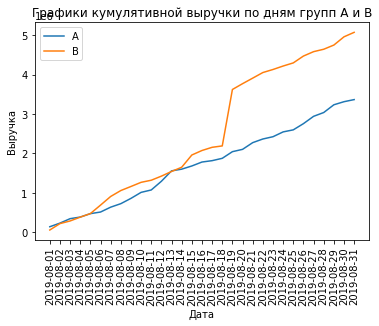

In [9]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']] # создаем переменные с данными о датах, выручке и числе заказов в группах A и B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A') # строим графики кумулятивной выручки по дням по группам.
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Графики кумулятивной выручки по дням групп А и В')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=90) # наклон на 90 градусов против часовой стрелки
plt.legend()
plt.show()

**Вывод**

Группа В лидирует практически с начала теста.

**3.2 Построим график кумулятивного среднего чека по группам**

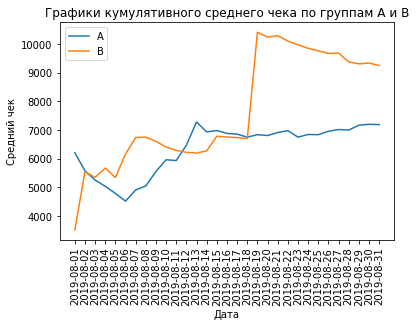

In [10]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A') # строим графики кумулятивного среднего чека по группам.
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=90) # наклон на 90 градусов против часовой стрелки
plt.legend() 
plt.show()

**Вывод**

Группа В также лидирует практически с начала теста.

**3.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

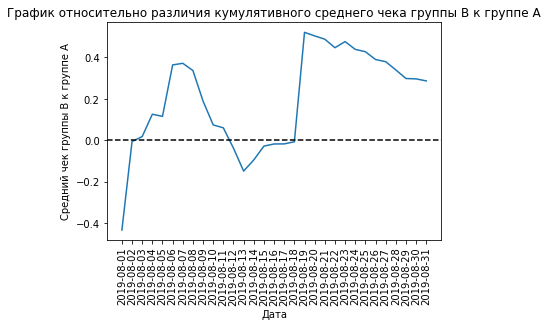

In [11]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']) #Объединяем таблицы cumulativeRevenueA и cumulativeRevenueB
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)  # строим график относительно различия кумулятивного среднего чека группы B к группе A.
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--') #добавили пунктирную линию оси X
plt.xticks(rotation=90) # наклон на 90 градусов против часовой стрелки
plt.show()

**Вывод**

В нескольких точках график различия между сегментами резко скачет в определенные даты.


**3.4 Построим график кумулятивной конверсии по группам**


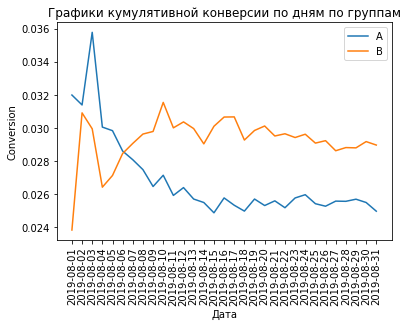

In [12]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] # добавим столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A') #строим графики кумулятивной конверсии по дням по группам
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Графики кумулятивной конверсии по дням по группам')
plt.xlabel('Дата')
plt.ylabel('Сonversion')
plt.xticks(rotation=90) # наклон на 90 градусов против часовой стрелки
plt.legend()
plt.show()

**Вывод**

В начале теста конверсия группы А лидировла, затем начала падать, а коверсия группы В расти и немного колебаться. К концу эксперимента конверсия стабилизировалась.

**3.5 Построим график относительного изменения кумулятивной конверсии группы B к группе A**

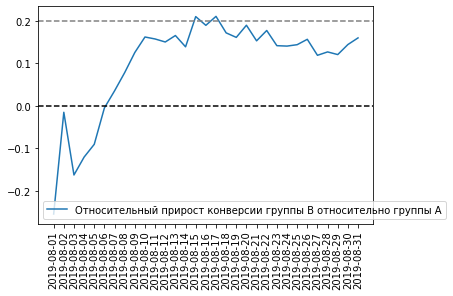

In [13]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) #объединим таблицы группы А и группы В
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A") #график относительного различия кумулятивной конверсии группы B к группе A
plt.legend()
plt.axhline(y=0, color='black', linestyle ='--') #добавим пунктирные линии оси X
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xticks(rotation=90) # наклон на 90 градусов против часовой стрелки
plt.show()

**Вывод**
Группа В лидирует по конверсии.

**3.6 Построим точечный график количества заказов по пользователям**

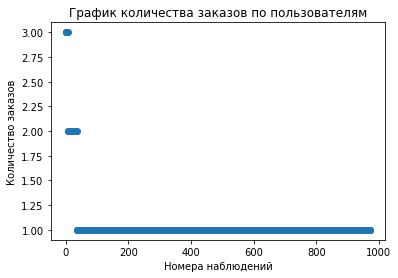

In [14]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}).sort_values(by='transactionId', ascending=False)) # находим число заказов по пользователям
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers))) 
plt.scatter(x_values, ordersByUsers['orders'])  #построим диаграмму
plt.title('График количества заказов по пользователям')
plt.xlabel('Номера наблюдений')
plt.ylabel('Количество заказов')
plt.show()

**Вывод**

Пользователей, оформивших заказ более 2-х раз мало.

**3.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя**

In [15]:
display(ordersByUsers.head(10))
display()
np.percentile(ordersByUsers['orders'], [95, 99]) #находим 95-й и 99-й перцентили количества заказов на пользователя

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


array([1., 2.])

**Вывод**

Не больше 5% пользователей совершали больше 1-го заказа и не более 1% пользователей совершали больше 2-х заказов.

**3.8 Построим точечный график стоимостей заказов**

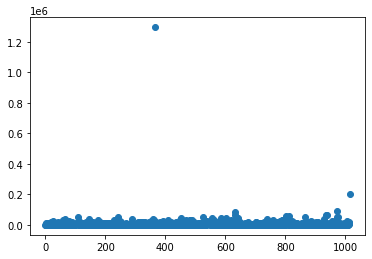

In [16]:
x_values = pd.Series(range(0, len(orders['revenue']))) #строим диаграмму методом scatter()
plt.scatter(x_values, orders['revenue'])
plt.show()

**Вывод**

Заказы стоимостью в 200 000 и свыше 1200 000 единичны.

**3.9 Посчитаем 95-й и 99-й перцентили стоимости заказов**

In [17]:
display(orders.head(10))
display()
np.percentile(orders['revenue'], [95, 99]) #находим 95-й и 99-й перцентили количества заказов на пользователя

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B
10,3649131742,879864040,2019-08-15,4008,A


array([26785., 53904.])

**Вывод**

Не более чем у 5% заказов чек дороже 26 785 и не больше, чем у 1% заказов - дороже 53 904.

**3.10 Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным**


Сформулируем нулевую и альтернативную гипотезы:

- H0 - различий в конверсии между группами А и В нет.
- H1 - различия в конверсии между группами А и В есть.

In [18]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
display()
display("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

'0.01102'

'0.160'

**Вывод**

P-value значительно меньше 0.05.  Различия в конверсии между группами А и В есть. Относительный прирост конверсии группы В к конверсии группы А равен 16%.

**3.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

Сформулируем нулевую и альтернативную гипотезы:

- H0 - различий в среднем чеке между группами А и В нет.
- H1 - различия в среднем чеке между группами А и В есть.

In [19]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display()
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.829'

'0.287'

**Вывод**

P-value больше 0.05-статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегменами 28,7%.

**3.12 Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным**

In [20]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], #убираем 1% пользователей с наибольшим числом заказов 
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 54000]['visitorId'] #убираем 1% пользователей с наибольшей стоимостью заказов
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head())
display(abnormalUsers.shape) #сколько всего аномальных пользователей 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64

(16,)

Сформулируем нулевую и альтернативную гипотезы:

- H0 - статистически значимых различий конверсии между группами А и В после удаления аномальных пользователей нет.
- H1 - статистические значимые различия конверсии между группами А и В после удаления аномальных пользователей есть.

In [21]:
sampleAFiltered = pd.concat(   #считаtv статистическую значимость различия конверсии после удаления аномальных пользователей.
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
display('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'0.00702'

'0.189'

**Вывод**

Всего 16 аномальных пользователей.
Статистические значимые различия конверсии между группами А и В после удаления аномальных пользователей есть.
Сегмент B значительно лучше А.

**3.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Сформулируем нулевую и альтернативную гипотезы:

- H0 - статистически значимых различий в среднем чеке между группами А и В по «очищенным» данным нет.
- H1 - статистические значимые различия в среднем чеке между группами А и В по «очищенным» данным есть.

In [22]:
display(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

'0.788'

'-0.032'

**Вывод**

P-value увеличился.Статистически значимых различий в среднем чеке между группами А и В по «очищенным» данным нет Разница между А и В - 3%.

**Общий вывод**

Различия в конверсии между группами А и В, а также статистические значимые различия конверсии между группами А и В после удаления аномальных пользователей есть.

По результатам теста принято решение - остановить тест, всвязи с победой группы В.
График различия конверсии между группами сообщает, что результаты группы А хуже группы В.
График различия среднего чека говорит о том, что результаты группы B ухудшаются незначительно.